<p><span style="color: rgb(41, 105, 176);"><strong><span style='font-family: "Times New Roman", Times, serif; font-size: 22px;'><u>Featurization and Model Tuning Project - Construction Industry</u></span></strong></span></p>

<p><strong><span style="color: rgb(0, 0, 0); font-size: 19px;">Objective&nbsp;</span></strong><span style="font-size: 19px;"><span style="color: rgb(0, 0, 0);">: <em>Modeling the strength of high performance concrete using Machine Learning</em></span><em>&nbsp;</em></span></p>

In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#ignoring deprecation warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#creating dataframe

df = pd.read_csv('concrete.csv')

<p><span style="color: rgb(41, 105, 176); font-size: 22px;">Attribute Information:</span></p>
<ul style="margin-left: 20px ">
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Cement </strong>: </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Blast </strong>: </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Fly ash</strong> : </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Water </strong>: </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Superplasticizer </strong>: </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Coarse </strong><strong>Aggregate</strong> : </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Fine</strong> <strong>Aggregate</strong> : </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">measured in kg in a m3 mixture</span></span></li>
    <li><span style="color: rgb(41, 105, 176);"><span style="font-size: 19px;"><strong>Age</strong> : </span></span><span style="color: rgb(0, 0, 0);"><span style="font-size: 19px;">day (1~365)</span></span></li>
</ul>
<p><span style="color: rgb(0, 0, 0); font-size: 19px;">Concrete compressive strength measured in MPa</span></p>`

In [4]:
#checking columns
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.shape

(1030, 9)

*The data has 1030 rows/obsevations and 9 columns/attributes.*

In [6]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

*All the columns ( independent and dependent ) are continuous in nature.*

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**The cement has maximum value and spread. The attributes slag,ash and superplastic have minimum value 0 which implies that some concrete do not use these components.*

In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

*There are no missing values in the given dataset.*

In [9]:
#counting values of 0 in different attributes
(df == 0).astype(int).sum(axis=0)

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

*As there are a lot of values of 0 for different attributes, suggesting that these are not critical component of concrete*
*We also have to assume that these values are correct and not missing values due to high counts*

<p><span style="font-family: Arial, Helvetica, sans-serif; color: rgb(41, 105, 176); font-size: 18px;"><strong>a. Univariate analysis&nbsp;</strong></span></p>

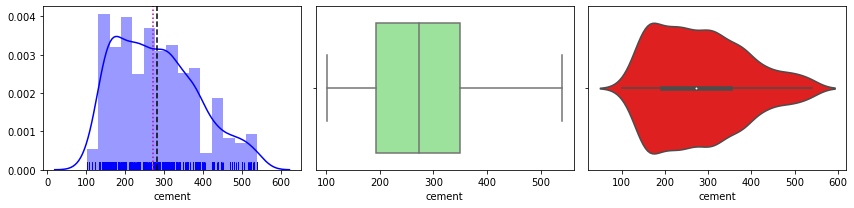

0.5094811788717731
-0.5206522844987744


In [10]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['cement'],color='blue',rug=True)
plt.axvline(df['cement'].mean(),color='k', linestyle='dashed')
plt.axvline(df['cement'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['cement'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['cement'],color='red')
plt.tight_layout()
plt.show()

print(df['cement'].skew())
print(df['cement'].kurtosis())

**The distribution of cement is slighly right skewed with no outliers**

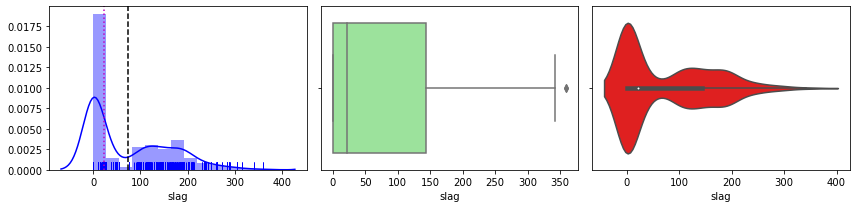

0.8007168956061774
-0.5081754788835435


In [11]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['slag'],color='blue',rug=True)
plt.axvline(df['slag'].mean(),color='k', linestyle='dashed')
plt.axvline(df['slag'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['slag'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['slag'],color='red')
plt.tight_layout()
plt.show()

print(df['slag'].skew())
print(df['slag'].kurtosis())

**The distribution of slag is right skewed with a few outliers. Ignoring the peak at 0 , there is distinct possibility of two mixed Gaussian.**

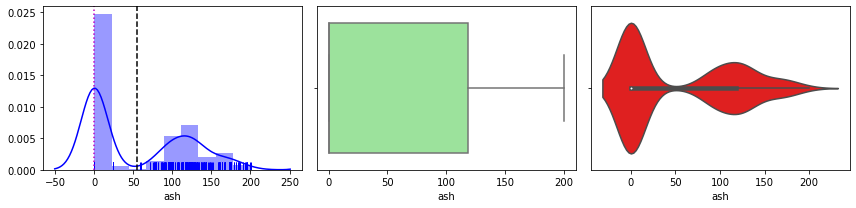

0.5373539058066844
-1.3287464346799722


In [12]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['ash'],color='blue',rug=True)
plt.axvline(df['ash'].mean(),color='k', linestyle='dashed')
plt.axvline(df['ash'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['ash'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['ash'],color='red')
plt.tight_layout()
plt.show()

print(df['ash'].skew())
print(df['ash'].kurtosis())

**The distribution of ash is fairly normal with no outliers.**

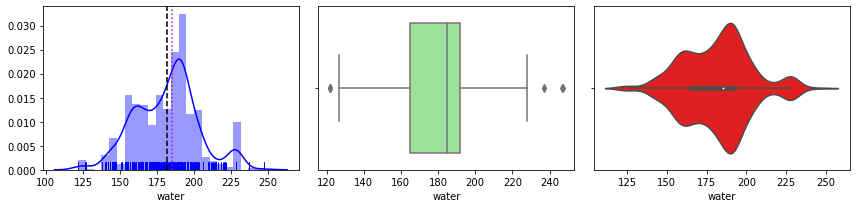

0.07462838428549402
0.1220816743945825


In [13]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['water'],color='blue',rug=True)
plt.axvline(df['water'].mean(),color='k', linestyle='dashed')
plt.axvline(df['water'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['water'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['water'],color='red')
plt.tight_layout()
plt.show()

print(df['water'].skew())
print(df['water'].kurtosis())

**The distribution of water is very slighly right skewed with outliers present on both the higher and lower side.**

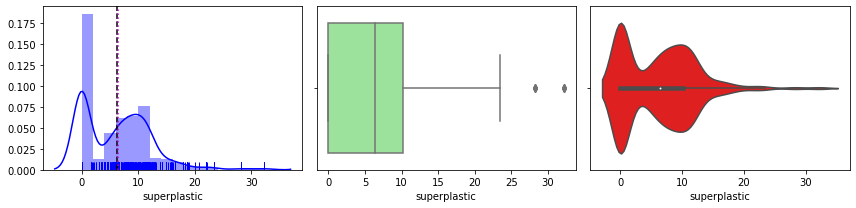

0.9072025748672466
1.4112689653489738


In [14]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['superplastic'],color='blue',rug=True)
plt.axvline(df['superplastic'].mean(),color='k', linestyle='dashed')
plt.axvline(df['superplastic'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['superplastic'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['superplastic'],color='red')
plt.tight_layout()
plt.show()
print(df['superplastic'].skew())
print(df['superplastic'].kurtosis())

**The superplastic has right skewed distribution with few outliers.Moreover it has a peak at 0 suggesting that many values are 0.**

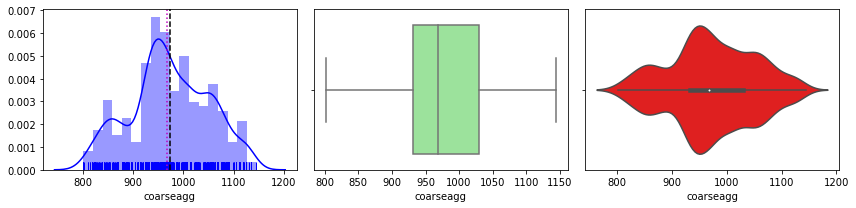

-0.04021974481106704
-0.5990161032185641


In [15]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['coarseagg'],color='blue',rug=True)
plt.axvline(df['coarseagg'].mean(),color='k', linestyle='dashed')
plt.axvline(df['coarseagg'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['coarseagg'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['coarseagg'],color='red')
plt.tight_layout()
plt.show()

print(df['coarseagg'].skew())
print(df['coarseagg'].kurtosis())

**The distribution of coarseagg is somewhat normal and no outliers are present.It is the highest quantity material used in cement with high standard deviation.**

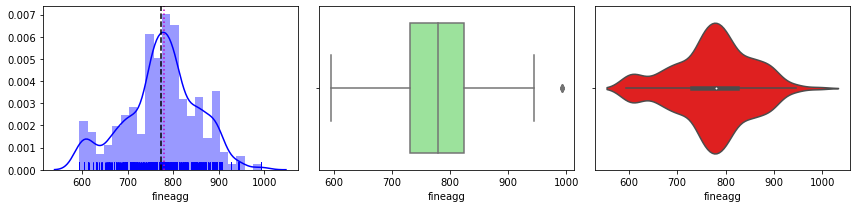

-0.25300959769707143
-0.10217698932117969


In [16]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['fineagg'],color='blue',rug=True)
plt.axvline(df['fineagg'].mean(),color='k', linestyle='dashed')
plt.axvline(df['fineagg'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['fineagg'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['fineagg'],color='red')
plt.tight_layout()
plt.show()

print(df['fineagg'].skew())
print(df['fineagg'].kurtosis())

**The distribution is left skewed and outliers on the right.It is also an important constituent of cement with very high values.**

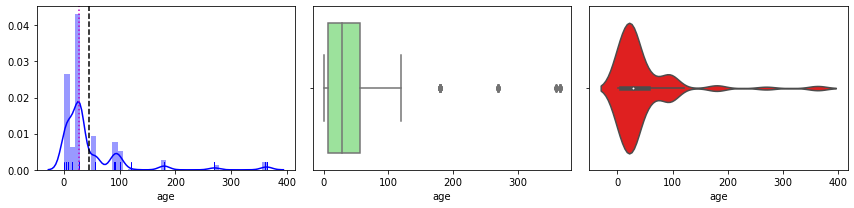

3.2691774006345895
12.168988978672088


In [17]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['age'],color='blue',rug=True)
plt.axvline(df['age'].mean(),color='k', linestyle='dashed')
plt.axvline(df['age'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['age'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['age'],color='red')
plt.tight_layout()
plt.show()

print(df['age'].skew())
print(df['age'].kurtosis())

**The distribution is very right skewed with a lot of outliers in the data for age.**

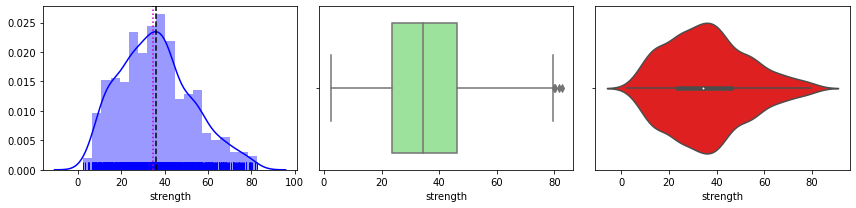

0.41697728841071807
-0.3137248604469969


In [18]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['strength'],color='blue',rug=True)
plt.axvline(df['strength'].mean(),color='k', linestyle='dashed')
plt.axvline(df['strength'].median(),color='m', linestyle='dotted')
plt.subplot(1,3,2)
sns.boxplot(df['strength'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['strength'],color='red')
plt.tight_layout()
plt.show()

print(df['strength'].skew())
print(df['strength'].kurtosis())

**The target variable strength has moderate skewness and a few outliers on the right.**

In [19]:
pd.DataFrame(data=(df[df.columns].skew(),df[df.columns].kurtosis()),index=['Skewness','Kurtosis']).T

,Skewness,Kurtosis
cement,0.509481,-0.520652
slag,0.800717,-0.508175
ash,0.537354,-1.328746
water,0.074628,0.122082
superplastic,0.907203,1.411269
coarseagg,-0.040220,-0.599016
fineagg,-0.253010,-0.102177
age,3.269177,12.168989
strength,0.416977,-0.313725


**The skewness and Kurtosis values suggest that some of the ditributions do not have a normal distribution.**

<p><span style="font-family: Arial, Helvetica, sans-serif; color: rgb(41, 105, 176); font-size: 18px;"><strong>b. Multivariate analysis&nbsp;</strong></span></p>

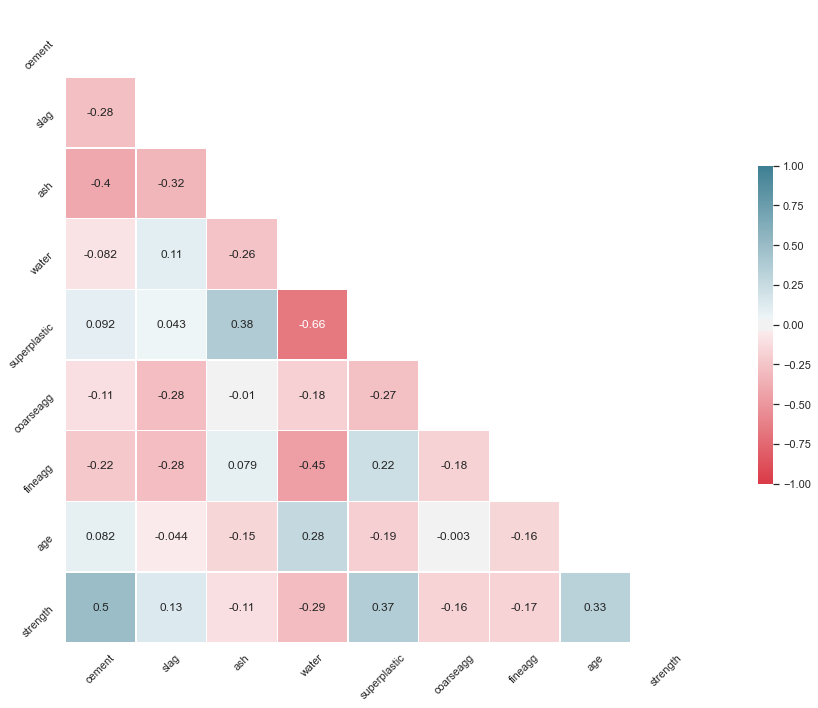

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**As we can see in the heatmap , no two columns have very high correlation.The maximum positive correlation is between Strength and cement , while the maximum negative correlation is between superplastic and water.**

0.4978319193241573


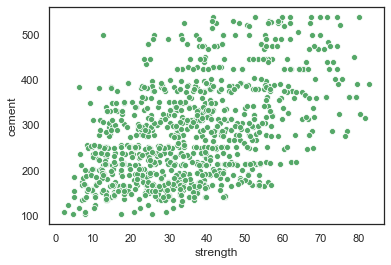

In [21]:
sns.scatterplot(y=df['cement'],x=df['strength'],color='g')
print(df['cement'].corr(df['strength']))
plt.show()

**Mild positive correlation between cement and strength.**

-0.6575329076284468


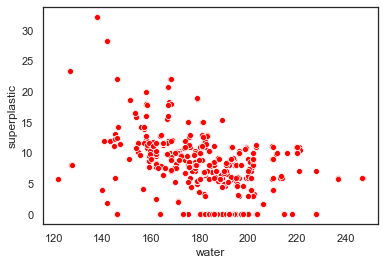

In [22]:
sns.scatterplot(y=df['superplastic'],x=df['water'],color='red')
print(df['superplastic'].corr(df['water']))
plt.show()

**Mild negative correlation between superplastic and water.**

0.1348292614974049


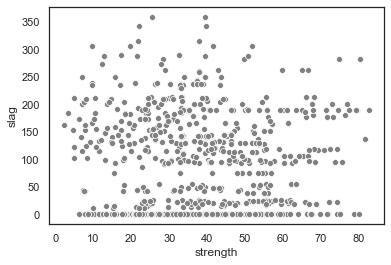

In [23]:
sns.scatterplot(y=df['slag'],x=df['strength'],color='grey')
print(df['slag'].corr(df['strength']))
plt.show()

**No significant correlation.**

-0.10575491629731354


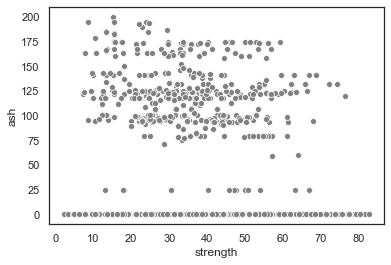

In [24]:
sns.scatterplot(y=df['ash'],x=df['strength'],color='grey')
print(df['ash'].corr(df['strength']))
plt.show()

**No significant correlation.**

-0.28963338498530455


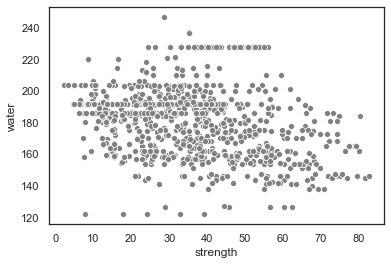

In [25]:
sns.scatterplot(y=df['water'],x=df['strength'],color='grey')
print(df['water'].corr(df['strength']))
plt.show()

**No significant correlation.**

0.3660788271885192


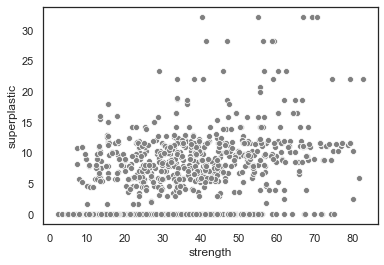

In [26]:
sns.scatterplot(y=df['superplastic'],x=df['strength'],color='grey')
print(df['superplastic'].corr(df['strength']))
plt.show()

**No significant correlation.**

-0.16493461446010962


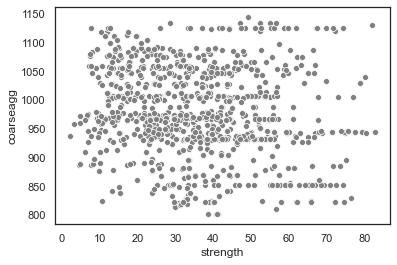

In [27]:
sns.scatterplot(y=df['coarseagg'],x=df['strength'],color='grey')
print(df['coarseagg'].corr(df['strength']))
plt.show()

**No significant correlation.**

-0.1672412472900582


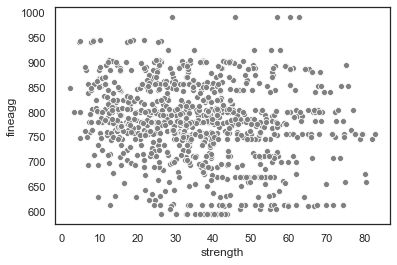

In [28]:
sns.scatterplot(y=df['fineagg'],x=df['strength'],color='grey')
print(df['fineagg'].corr(df['strength']))
plt.show()

**No significant correlation.**

0.3288730007799875


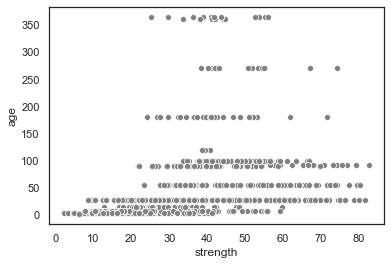

In [29]:
sns.scatterplot(y=df['age'],x=df['strength'],color='grey')
print(df['age'].corr(df['strength']))
plt.show()

**No significant correlation.**

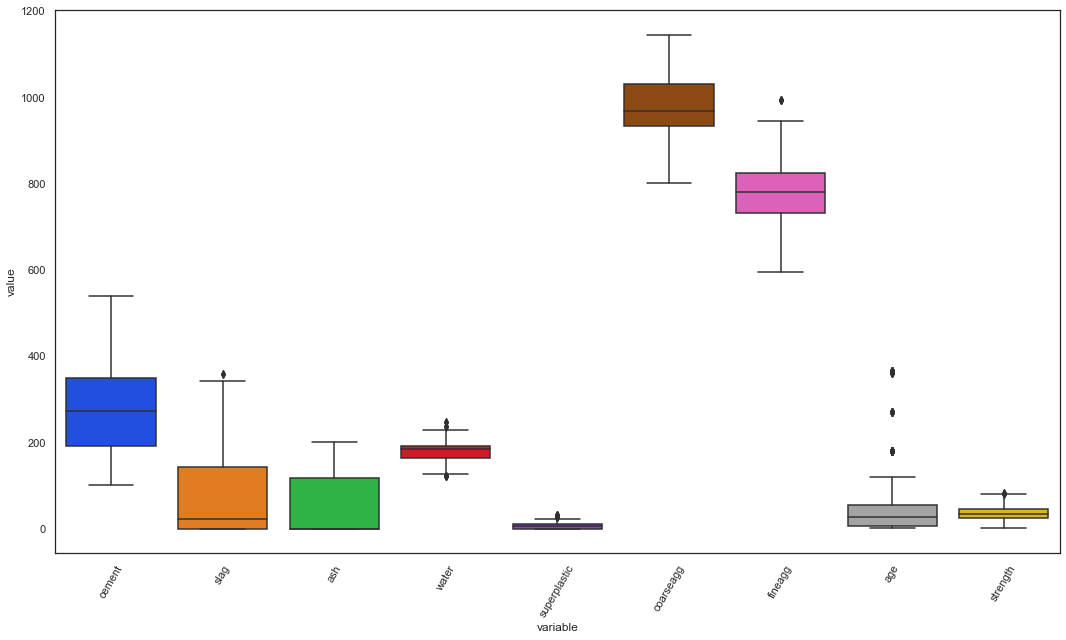

In [162]:
plt.figure(figsize=(18,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df),palette='bright')
plt.xticks(rotation=60)
plt.show()

**The maximum used components in decreasing order in concrete are Coarseagg,fineagg and cement respectively.**
**On visual inspection we can see that cement has highest spread, while slag , ash and cement superplastic have values touching zero.**

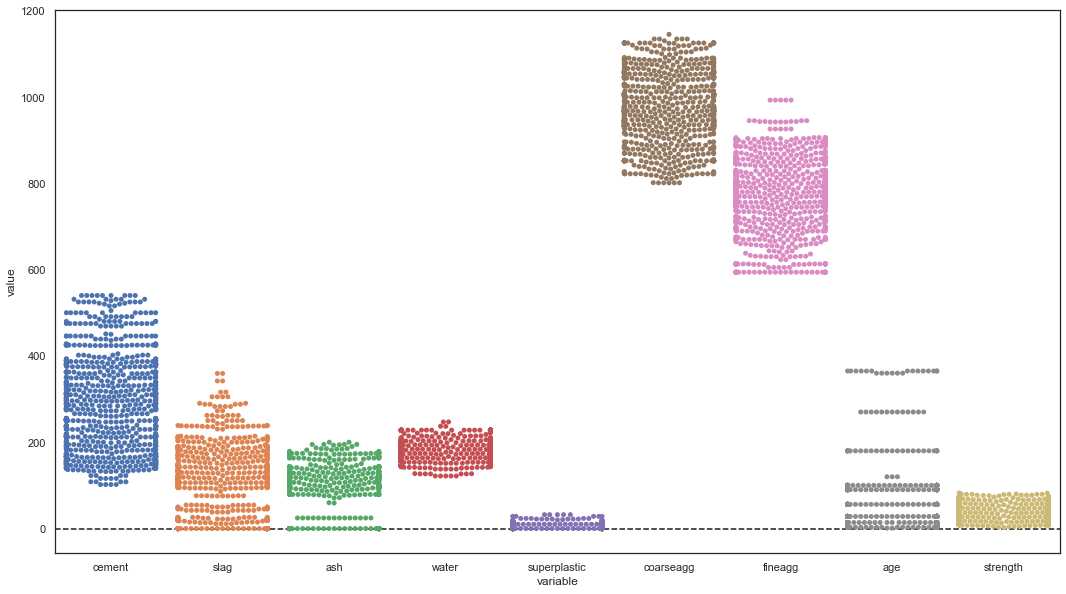

In [163]:
plt.figure(figsize=(18,10))
sns.swarmplot(x="variable", y="value", data=pd.melt(df))
plt.axhline(0,color='k', linestyle='dashed')
plt.show()

**The swarm plot depicts the frequency of values across the distribution.Age has lower density of values in the higher spectrum.**
**The strength has fairly consistent distribution all across.**
**The slag,ash and superplastic have very high vlue count at 0.**

<p><span style="font-family: Arial, Helvetica, sans-serif; color: rgb(41, 105, 176); font-size: 18px;"><strong>c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation&nbsp;</strong></span></p>

**We will use the standard deviation of more than 3 to replace the outliers with median values.**

In [164]:
#Counting the outliers

print('Number of outliers in cement: ',df[((df.cement - df.cement.mean()) / df.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df[((df.slag - df.slag.mean()) / df.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',df[((df.ash - df.ash.mean()) / df.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',df[((df.water - df.water.mean()) / df.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',df[((df.superplastic - df.superplastic.mean()) / df.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',df[((df.coarseagg - df.coarseagg.mean()) / df.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',df[((df.fineagg - df.fineagg.mean()) / df.fineagg.std()).abs() >3]['fineagg'].count())

print('Number of outliers in age: ',df[((df.age - df.age.mean()) / df.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


In [33]:
#Creating df copy to replace outliers 

df1=df.copy(deep=True)
for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

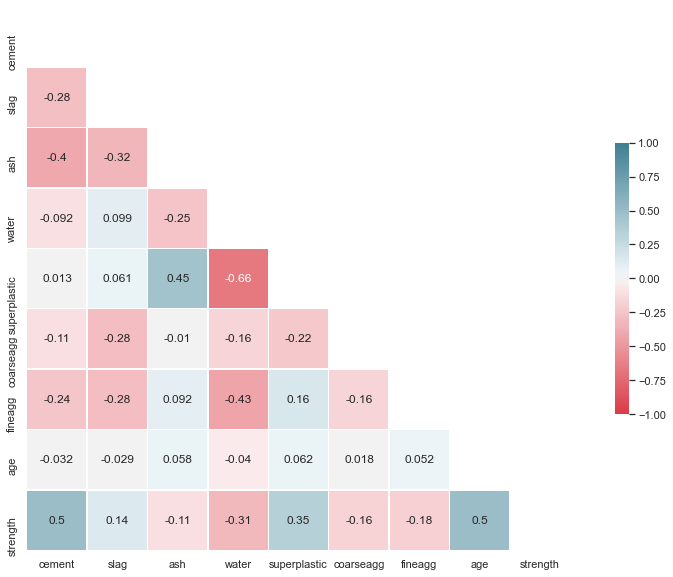

In [34]:
sns.set(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

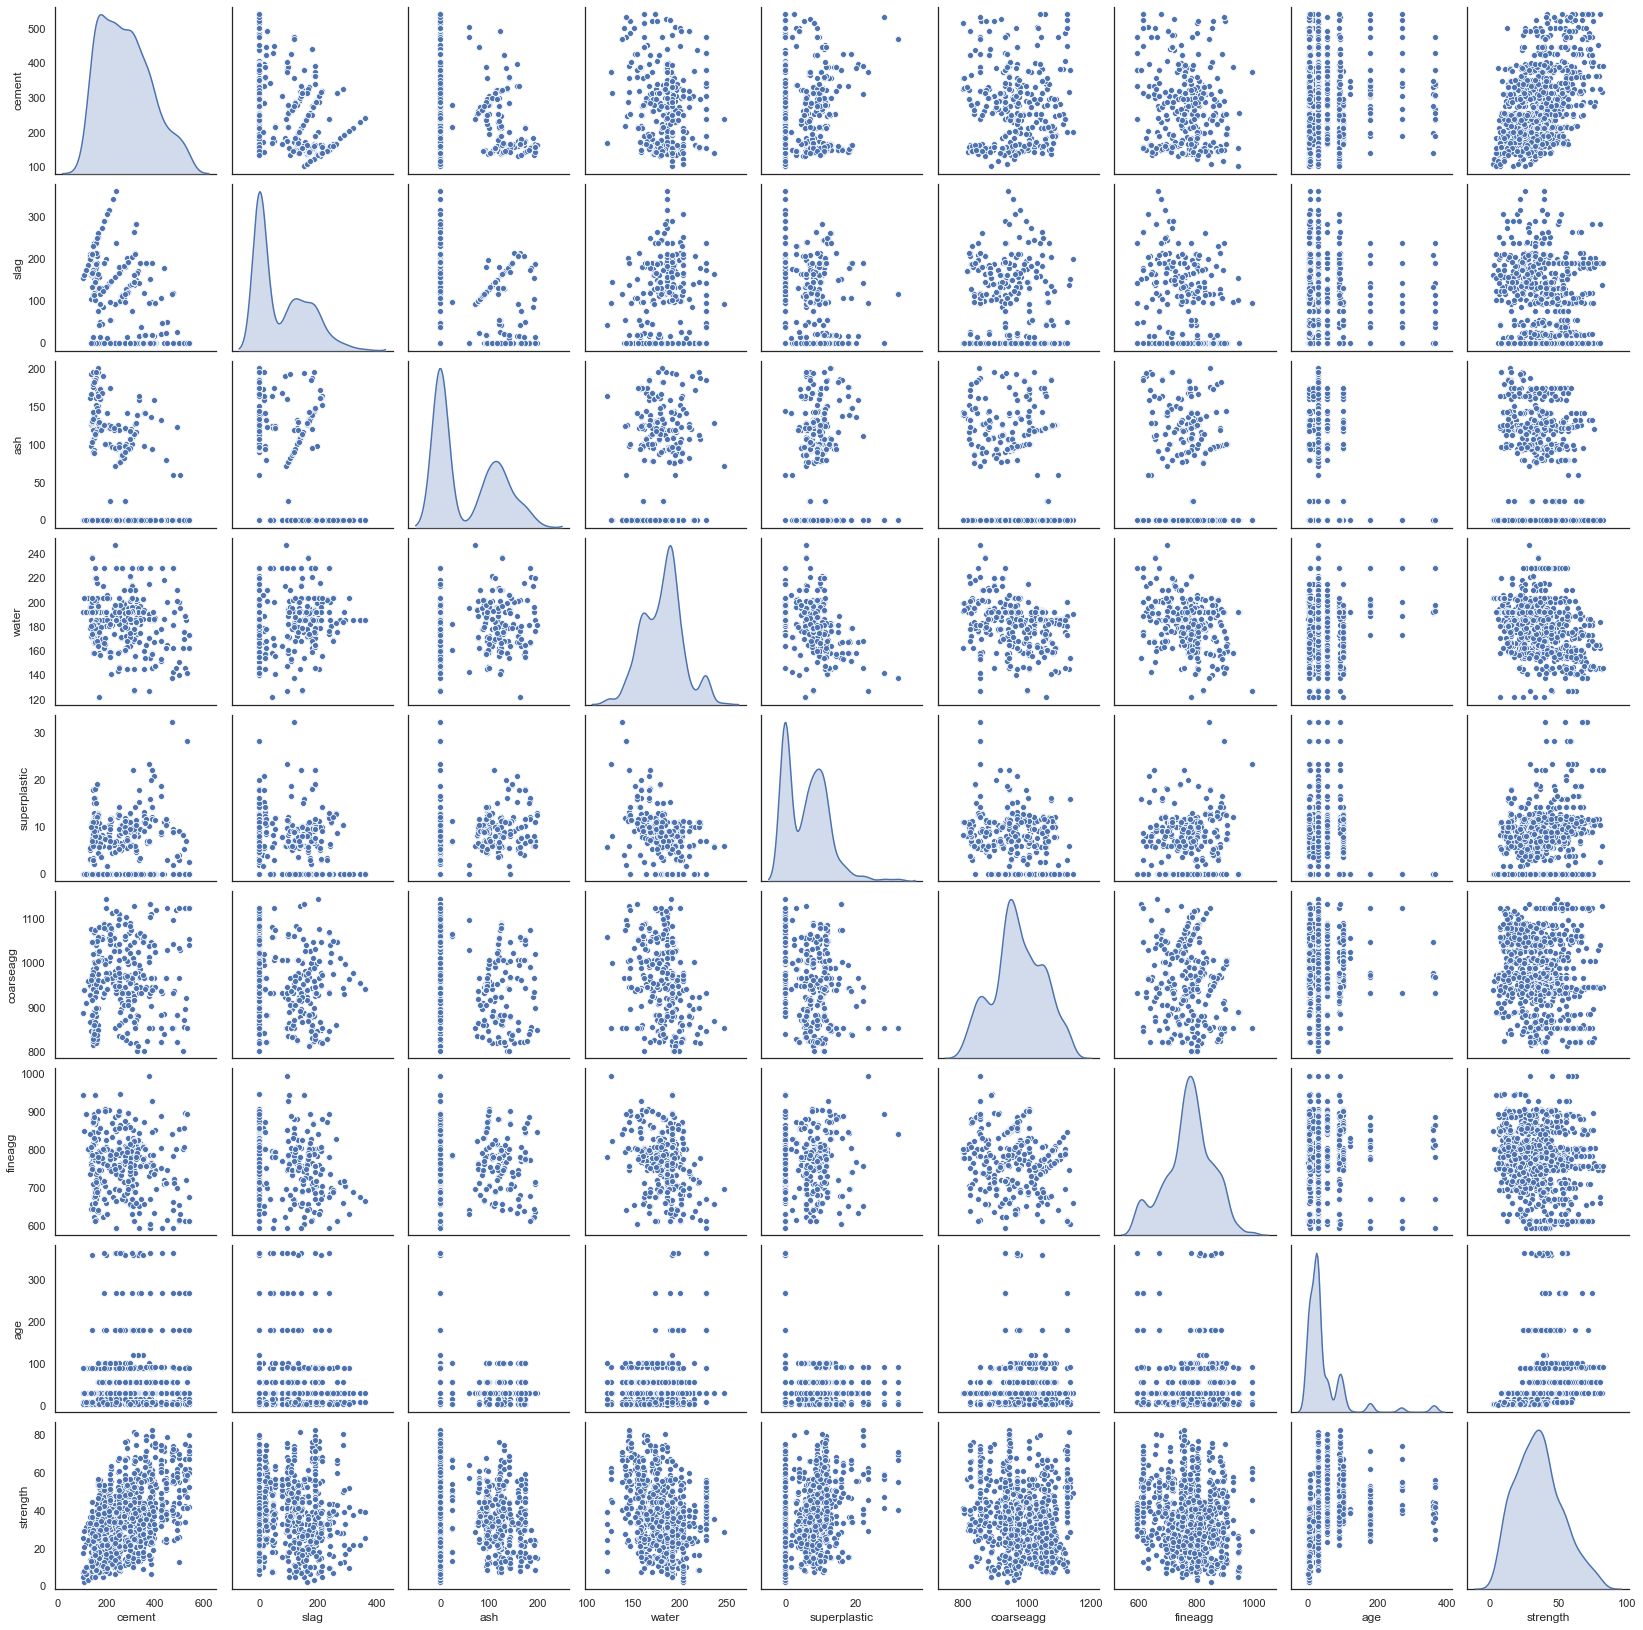

In [165]:
sns.pairplot(df,diag_kind='kde')

**As evident from the kde graph , there is distinct possibility of at least three mixed Gaussians.**

In [166]:
#Split data into test and training set
#Import train_test_split function

from sklearn.model_selection import train_test_split

In [37]:
X= df1.drop(['strength'],axis=1)
y= df1['strength']

In [38]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0


In [39]:
X.shape,y.shape

((1030, 8), (1030,))

In [40]:
#random state
seed = 7

In [41]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

In [42]:
#We are using MInMaxScaler as some of the distributions are not normal
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()

In [43]:
X_train[X_train.columns] = trans.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = trans.fit_transform(X_test[X_test.columns])

**Scaling should be done on training and test set separately.**

In [44]:
X_train.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

**As the target variable strength is continuous variable.We will be using Regession Techniques.**

In [168]:
#importing regression models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cement is 41.50953444916752
The coefficient for slag is 21.228411162657736
The coefficient for ash is 5.178381375231458
The coefficient for water is -20.276711722516644
The coefficient for superplastic is 6.858902344438593
The coefficient for coarseagg is -3.72158137947174
The coefficient for fineagg is -10.372354696547344
The coefficient for age is 36.86282330202069


In [47]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 19.667539210880495


In [48]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 40.09007655  19.96528208   4.30698816 -20.65980686   7.24279304
  -4.37605863 -11.22095094  36.57647357]


In [49]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 39.49837612  18.95939947   2.71883591 -13.50164723  10.87231444
  -0.43757669  -6.65063542  34.86953926]


In [50]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7219718060186744
0.6682442686239612


In [51]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.721865732005939
0.6690066284228484


In [52]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7155381303932291
0.6776280179717346


**The performance of all three regression techniques is fairly similar.**
**The linear model has best training as well as testing accuracy.It suggests that all the given columns are critical to the final model building.**

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
num_folds = 30

**Using K-Fold method to understand the average mode accuracy for the above given models.**

In [55]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(regression_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.61097419 0.54494479 0.75904819 0.77295653 0.49694362 0.69835927
 0.81389046 0.74226623 0.69363826 0.52134193 0.644748   0.71381244
 0.78084815 0.75980689 0.5872161  0.68396535 0.71516716 0.80685921
 0.59937169 0.89092965 0.62500394 0.78647901 0.56593881 0.81395364
 0.69000422 0.77604183 0.56377527 0.78623634 0.59957983 0.60292548]
Accuracy: 68.823% (10.076%)


In [56]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(ridge, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.61097369 0.54494508 0.75904821 0.77295642 0.49694359 0.69835942
 0.81389026 0.74226598 0.69363807 0.5213423  0.6447478  0.71381225
 0.78084822 0.75980759 0.58721657 0.68396528 0.71516755 0.80685908
 0.59937156 0.89092965 0.62500394 0.78647895 0.56593914 0.81395391
 0.69000408 0.77604205 0.56377669 0.78623615 0.59957925 0.60292519]
Accuracy: 68.823% (10.076%)


In [57]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(lasso, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.61046927 0.54534636 0.75899998 0.77284585 0.49691036 0.698494
 0.81364518 0.74191578 0.69344394 0.52181804 0.64443828 0.71355257
 0.78091014 0.76041254 0.58765213 0.68380049 0.71558781 0.80668074
 0.59925588 0.89096292 0.62495546 0.78638134 0.56638022 0.8141698
 0.68986523 0.7762262  0.56505811 0.78601278 0.59889201 0.60259295]
Accuracy: 68.826% (10.068%)


**The lasso has a very slight advantage over linear and ridge regression.**

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [60]:
df2= df1.copy(deep=True)

In [61]:
X= df2.drop(['strength'],axis=1)
y= df2['strength']

In [62]:
X.shape,y.shape

((1030, 8), (1030,))

In [63]:
X = trans.fit_transform(X)

In [64]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [65]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_)


[ 2.19704550e-14  6.43683911e+01 -5.28286735e+00  4.21419332e+01
  7.21486132e+01  5.54929774e+01 -3.15307268e+00 -2.08775851e+01
  7.32429281e+00  2.50000323e+01  1.44055291e+01 -6.68196514e+01
 -5.60199500e+01  2.61483727e+01  1.23929017e+01  2.80384797e+01
  1.87832219e+01 -2.99748238e+01 -1.96638375e+01  2.86906901e+01
  3.35251946e+01  4.46908903e+01 -7.14235907e+01 -6.16598430e+01
  3.91205256e+00  3.90484398e+00  2.73035986e+01  1.88190071e+01
 -5.49391578e+01 -1.66863287e+01 -9.61619450e+00 -1.79013458e+01
 -6.00987046e+00 -4.46268665e+00  3.63637184e+01  6.57592297e+00
  8.19292766e+00]


In [66]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [  0.          28.4706748   -8.6295198    4.16102764   8.20381508
  -1.68675475  -8.09690772 -19.63695094  19.64199453  10.93244821
  10.13104279  -7.90926511  -9.38818598  17.96037829  12.66332655
  14.37302449  12.53613101  -1.45919563  10.78863658  12.0970537
  22.92811934  30.47214074 -20.69553831 -22.51495448   5.91906781
  12.06460567  15.90915182  17.93321584 -33.80540913 -10.62604123
  -4.39611796   4.47475677   4.9538366    4.82395022  18.98450937
   3.98978164   0.1641705 ]


In [67]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [  0.          31.81172753  -0.           0.           0.
   0.           0.         -17.6150205   18.65317157   1.58557684
   3.06279141   0.          -1.92853469   9.31886156   7.34128157
  13.76191655   8.38560739  -0.           9.14593599   3.5735327
  18.10646429  31.93404493 -11.59134196 -17.24617401   3.86784591
  13.29822208  18.06904206  14.4500821  -36.16433922  -7.14582839
  -0.           1.74410242   0.87578111   3.01423523  17.22992372
   1.51035712   0.        ]


In [68]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7839428342452036
0.7590619406039986


In [69]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7742187374972769
0.7464972040250606


In [70]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7684581544275749
0.7366695820873319


**The usage of polynomial features upto degree 2 increase the accuracy of all three regression techniques employed.The higher accuracy of linear regression over lasso and ridge regression suggests that all the components of the concrete are critical to final model building.**

In [71]:
num_folds = 30

In [158]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(regression_model, X_poly, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.7534734  0.60976067 0.77382062 0.72814469 0.54982722 0.80872836
 0.84581704 0.79262293 0.74906663 0.64453956 0.79346698 0.81983994
 0.81820162 0.76303402 0.66211406 0.73731382 0.75937877 0.84035154
 0.6872182  0.84543869 0.72359362 0.8021325  0.67896714 0.81249081
 0.69194557 0.87075033 0.46449515 0.77490021 0.68100927 0.71569498]
Accuracy: 73.994% (8.990%)


In [159]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(ridge, X_poly, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.74786096 0.59318012 0.80259122 0.76190056 0.53991535 0.76966741
 0.84449775 0.79810153 0.75977513 0.60276255 0.77787778 0.80944234
 0.817819   0.75531778 0.66141069 0.70838988 0.75819195 0.83346425
 0.66019622 0.85427391 0.70308577 0.80831403 0.67434063 0.82314075
 0.69530721 0.87150699 0.50165263 0.79577882 0.6666196  0.68612064]
Accuracy: 73.608% (9.183%)


In [160]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(lasso, X_poly, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.64597329 0.56523629 0.7682732  0.73585344 0.51926611 0.71631967
 0.8036643  0.72626254 0.71162592 0.54159679 0.66343212 0.71938392
 0.76832295 0.77126909 0.58102894 0.66673158 0.73801498 0.77646707
 0.63340239 0.8493263  0.61045749 0.78213083 0.59083935 0.77115993
 0.7061649  0.7678157  0.60238636 0.76849479 0.64155523 0.57738719]
Accuracy: 69.066% (8.637%)


**Using Kfold to find the average performance of the models.We find that the linear regression has highest accuracy and lasso has lowest accuracy.**

In [91]:
#Trying to find clusters in the given dataset
from sklearn.cluster import KMeans

In [92]:
cluster_range = range( 2, 7 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.148346e+07
1,3,1.557720e+07
2,4,1.337173e+07
3,5,1.122278e+07
4,6,1.015797e+07


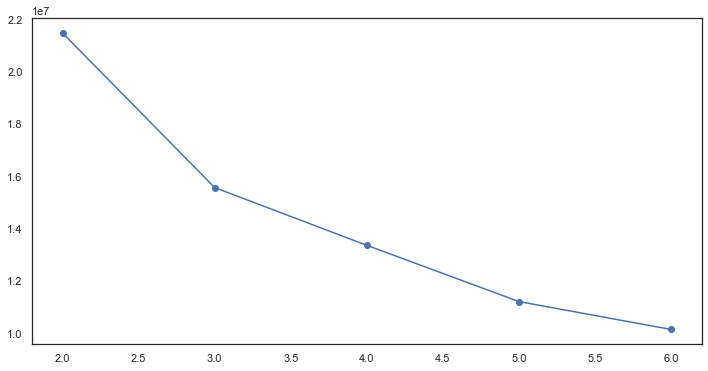

In [93]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

**There may be 3-5 clusters in the given dataset.**

In [94]:
#Using Principal Component Analysis to see if it improves model accuracy

from sklearn.decomposition import PCA
covMatrix = np.cov(X_train,rowvar=False)
print(covMatrix)

[[ 0.05651303 -0.015328   -0.03028094 -0.00523567  0.00080283 -0.0112546
  -0.0023756 ]
 [-0.015328    0.06051145 -0.02517878  0.00452848  0.00578761 -0.01552855
  -0.0006885 ]
 [-0.03028094 -0.02517878  0.10184906 -0.01583311  0.0313175   0.00636736
   0.0035917 ]
 [-0.00523567  0.00452848 -0.01583311  0.03986553 -0.030533   -0.01741074
  -0.00140966]
 [ 0.00080283  0.00578761  0.0313175  -0.030533    0.05350401  0.00826668
   0.00273126]
 [-0.0112546  -0.01552855  0.00636736 -0.01741074  0.00826668  0.04718779
   0.00252274]
 [-0.0023756  -0.0006885   0.0035917  -0.00140966  0.00273126  0.00252274
   0.05472844]]


In [95]:
pca = PCA(n_components=7)
pca.fit(X_train)

PCA(n_components=7)

In [96]:
print(pca.explained_variance_)

[0.14119061 0.07695218 0.06946498 0.05529596 0.05150335 0.0118622
 0.00789003]


In [97]:
print(pca.components_)

[[-0.24967895 -0.22677476  0.78835146 -0.27130255  0.38020143  0.20615265
   0.06386304]
 [ 0.6662608  -0.62808646 -0.16319939 -0.27660168  0.08629558  0.22453132
  -0.02449848]
 [ 0.15361769  0.54619605 -0.27279253 -0.47032056  0.61276604  0.06464021
   0.05285565]
 [-0.19523652 -0.05176977 -0.19826472 -0.0245552  -0.12878195  0.40350703
   0.86016744]
 [ 0.38099242  0.02335156  0.25445868  0.1376348   0.13388117 -0.70735384
   0.50232789]
 [-0.12833239  0.01732609  0.03183606 -0.77808695 -0.53628784 -0.29818879
   0.01663021]
 [ 0.52001619  0.50221996  0.41518733  0.06098701 -0.3878197   0.38836129
   0.00545222]]


In [98]:
print(pca.explained_variance_ratio_)

[0.34090894 0.18580333 0.16772527 0.13351374 0.12435638 0.02864164
 0.0190507 ]


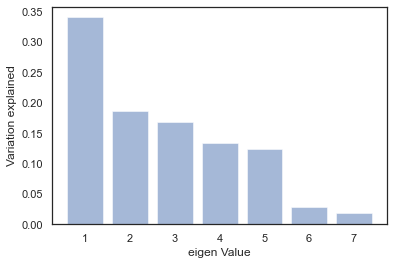

In [99]:
plt.bar(list(range(1,8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

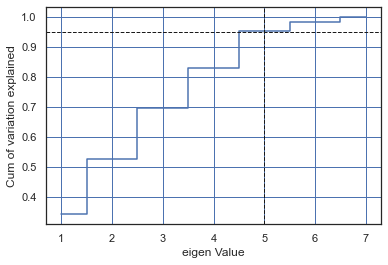

In [100]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.grid(color='b', linestyle='solid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(0.95,color='k', linestyle='dashed', linewidth=1)
plt.axvline(5,color='k', linestyle='dashed', linewidth=1)
plt.show()

In [101]:
#using 5 components
pca5 = PCA(n_components=5)
pca5.fit(X)
print(pca5.components_)
print(pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(X)

[[ 9.11355810e-01 -2.57169534e-01 -2.38884450e-01  2.09509425e-04
  -4.11756797e-03 -2.14752146e-01 -9.65172961e-03]
 [ 8.39196342e-03  7.76245219e-01 -3.17295359e-01  6.87550031e-02
  -7.45303090e-03 -5.40007316e-01 -1.74897431e-02]
 [-1.11312212e-01 -2.95757127e-01  5.71609710e-01  6.84594293e-02
   5.03194161e-03 -7.54113449e-01  7.38278235e-04]
 [-3.74536963e-01 -4.78340003e-01 -6.85371974e-01  2.96662689e-01
  -9.44996924e-02 -2.50357021e-01 -3.95042006e-02]
 [-6.34673182e-03 -8.17717265e-03 -3.64142403e-02  1.00472527e-02
   1.67891250e-03 -2.15564265e-02  9.98998704e-01]]
[0.42969095 0.31337803 0.16388342 0.05915479 0.025826  ]


In [102]:
Xpca5

array([[-1.44975117e+02,  1.38337278e+02, -3.68487920e+01,
         3.63846199e+01, -1.79795800e+00],
       [-1.16010140e+02, -6.13790670e+01,  4.23280694e+01,
        -3.74092530e+00, -2.05611609e+01],
       [-3.84806281e+01, -1.17686440e+02, -1.76079761e+01,
        -2.02081893e+00, -6.82106596e+00],
       ...,
       [-2.30276842e+01,  2.38979985e+01,  1.15991268e+01,
        -4.30721272e+01, -5.81060306e+00],
       [ 9.95446690e+01,  4.90299485e+01,  5.31477489e+01,
         7.13674741e+01,  2.89418141e-01],
       [ 3.02197597e+02,  4.85604153e+01,  8.15503960e+01,
         1.41695660e+01, -2.09593576e+01]])

In [103]:
principalDf = pd.DataFrame(data = Xpca5
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])

In [104]:
principalDf.shape

(1030, 5)

In [105]:
class_copy=df1['strength'].reset_index(drop=True)

In [106]:
finalDf = pd.concat([principalDf, class_copy], axis = 1)

In [107]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,strength
0,-144.975117,138.337278,-36.848792,36.384620,-1.797958,29.89
1,-116.010140,-61.379067,42.328069,-3.740925,-20.561161,23.51
2,-38.480628,-117.686440,-17.607976,-2.020819,-6.821066,29.22
3,10.736743,107.386796,39.129935,63.478443,0.150305,45.85
4,-114.232211,143.453211,8.517728,54.091482,-0.620353,18.29


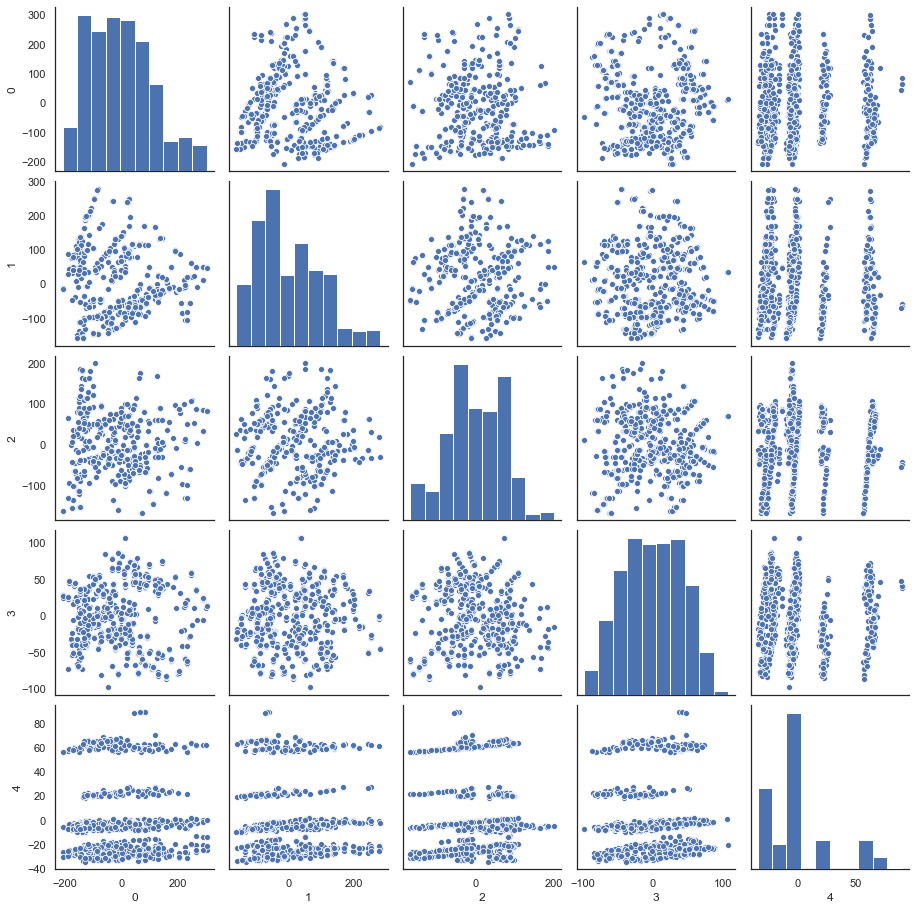

In [108]:
sns.pairplot(pd.DataFrame(Xpca5))

In [109]:
df4=finalDf.copy(deep=True)
X= df4.drop(['strength'],axis=1)
y= df4['strength']

In [111]:
X.shape,y.shape

((1030, 5), (1030,))

In [112]:
#random state
seed = 7

In [113]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

In [114]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()

In [115]:
X_train[X_train.columns] = trans.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = trans.fit_transform(X_test[X_test.columns])

In [116]:
X_train.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'principal component 4',
       'principal component 5'],
      dtype='object')

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [118]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for principal component 1 is 33.72488977455369
The coefficient for principal component 2 is 16.36726460257649
The coefficient for principal component 3 is -2.5725676010425644
The coefficient for principal component 4 is -37.355514138772065
The coefficient for principal component 5 is 37.608490868157396


In [119]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 24.93767494657358


In [120]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 33.43934658  16.22839378  -2.558605   -37.00116379  37.29866249]


In [121]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 31.73852894  14.30397416  -0.         -35.05755333  35.64393887]


In [122]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6972010624506597
0.6256472384078259


In [123]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6971482135180201
0.6283025516812125


In [124]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6934645119260803
0.6378109113682108


**As we can see that PCA actually decreased the models accuracy.**

In [125]:
regression_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [127]:
num_folds = 30

In [128]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(regression_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.57711734 0.52904028 0.72594675 0.76541302 0.44999673 0.66922582
 0.78153498 0.71659585 0.66039219 0.57105548 0.61371703 0.7144539
 0.7422422  0.7645533  0.58262491 0.65063959 0.72648638 0.78309263
 0.58739749 0.8668466  0.65058843 0.76725947 0.58401735 0.79240004
 0.65418618 0.76207653 0.61750976 0.7446204  0.49060829 0.5985034 ]
Accuracy: 67.134% (9.815%)


In [129]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(ridge, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.57711741 0.52904038 0.72594675 0.765413   0.44999682 0.66922581
 0.78153497 0.71659585 0.66039226 0.57105551 0.61371708 0.71445395
 0.74224228 0.76455332 0.58262487 0.65063956 0.72648643 0.78309262
 0.58739746 0.86684655 0.65058838 0.76725945 0.58401737 0.7924
 0.65418608 0.76207653 0.61750983 0.74462037 0.49060827 0.59850337]
Accuracy: 67.134% (9.815%)


In [130]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(lasso, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.57723404 0.52921027 0.72595496 0.76538809 0.45007479 0.66920088
 0.78149677 0.71656485 0.66052671 0.57111977 0.61378034 0.71449908
 0.74233639 0.76456069 0.58258649 0.6506072  0.72652027 0.78307223
 0.58736929 0.86678008 0.65054532 0.76722068 0.58402294 0.79231108
 0.65412658 0.76204378 0.61761742 0.74459561 0.49056192 0.59846179]
Accuracy: 67.135% (9.812%)


**The average accuracy of PCA is less than normal regression models applied.**

***We will use RandomSearch CV to find accuracy of models with hyperparameter tuning and see if it improves accuracy.***

In [131]:
lasso.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [132]:
ridge.get_params()

{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [133]:
# use a full grid over all parameters
param_grid_lasso = {"alpha": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              "max_iter": [1000,2000,3000,4000],
              "random_state": [1, 2, 3,4,5,6,7,8,9,10],
              "selection":['cyclic','random']
              }

In [134]:
# use a full grid over all parameters
param_grid_ridge = {"alpha": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              "random_state": [1, 2, 3,4,5,6,7,8,9,10],
              "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
              }

In [135]:
from sklearn.model_selection import RandomizedSearchCV
# run randomized search
samples = 10  # number of random samples 
randomCV_ridge = RandomizedSearchCV(ridge, param_distributions=param_grid_ridge, n_iter=samples) #default cv = 3

In [136]:
randomCV_ridge.fit(X_train, y_train)
 
print(randomCV_ridge.best_params_)

{'solver': 'cholesky', 'random_state': 3, 'alpha': 0.2}


In [137]:
# run randomized search
samples = 10  # number of random samples 
randomCV_lasso = RandomizedSearchCV(lasso, param_distributions=param_grid_lasso, n_iter=samples) #default cv = 3

In [138]:
randomCV_lasso.fit(X_train, y_train)

 
print(randomCV_lasso.best_params_)

{'selection': 'random', 'random_state': 5, 'max_iter': 4000, 'alpha': 0.1}


In [139]:
df5=df1.copy(deep=True)
X= df5.drop(['strength','coarseagg'],axis=1)
y= df5['strength']

In [140]:
X.head()

,cement,slag,ash,water,superplastic,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,696.7,28.0


In [141]:
X.shape,y.shape

((1030, 7), (1030,))

In [142]:
#random state
seed = 7

In [143]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

In [144]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()

In [145]:
X_train[X_train.columns] = trans.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = trans.fit_transform(X_test[X_test.columns])

In [146]:
X_train.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'fineagg', 'age'], dtype='object')

In [147]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cement is 44.96519797625404
The coefficient for slag is 24.403286136477668
The coefficient for ash is 7.083051757163934
The coefficient for water is -16.37646265093472
The coefficient for superplastic is 7.911113384536737
The coefficient for fineagg is -6.832703734387376
The coefficient for age is 36.7992086141232


In [148]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10.960510829296851


In [149]:
ridge = Ridge(solver= 'lsqr', random_state= 2, alpha= 0.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 43.96250333  23.53856884   6.42219948 -16.24556854   8.49328005
  -7.24117993  36.50341023]


In [150]:
lasso = Lasso(selection= 'cyclic', random_state= 7, max_iter= 2000, alpha= 0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 39.9049902   19.33282709   2.94313582 -13.04333834  10.99539074
  -6.23437247  34.8620726 ]


In [151]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7213227824976638
0.6702813412839919


In [152]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.721216085108032
0.6714317748562156


In [153]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7153947291561368
0.6778335364399124


In [154]:
num_folds = 30

In [155]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(regression_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.61313277 0.55662677 0.75581238 0.78606653 0.49631546 0.69780588
 0.81719047 0.7446208  0.6948439  0.52453413 0.64375695 0.71336919
 0.78256285 0.75681313 0.58528951 0.68084236 0.71310281 0.80521662
 0.5965444  0.89572191 0.62271335 0.78426157 0.57118972 0.81390522
 0.68696616 0.77697817 0.55752229 0.7870084  0.59847109 0.61048556]
Accuracy: 68.899% (10.085%)


In [156]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(ridge, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.61313224 0.55662734 0.75581232 0.78606653 0.49631542 0.69780605
 0.81719033 0.74462055 0.69484369 0.52453458 0.64375669 0.71336895
 0.78256295 0.75681378 0.58528996 0.68084218 0.71310314 0.80521643
 0.59654418 0.89572203 0.62271328 0.78426144 0.5711902  0.81390556
 0.68696592 0.77697846 0.55752337 0.78700822 0.59847044 0.61048532]
Accuracy: 68.899% (10.085%)


In [157]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(lasso, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.61268213 0.55716831 0.75571892 0.78602898 0.49628044 0.69793635
 0.81701552 0.74430715 0.69466312 0.52504203 0.64343552 0.71310972
 0.78262576 0.75736674 0.58568348 0.68061507 0.71347128 0.8050125
 0.59638426 0.8958152  0.62262997 0.78412937 0.57169005 0.81414004
 0.68677671 0.77718269 0.55861631 0.78680869 0.59777595 0.61023451]
Accuracy: 68.901% (10.077%)


<p>&nbsp;</p>
<table style="border: none;border-collapse: collapse;width:628pt;">
    <tbody>
        <tr>
            <td rowspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:1.0pt solid windowtext;border-right:none;border-bottom:1.0pt solid black;border-left:1.0pt solid windowtext;height:31.5pt;width:48pt;">S.No.</td>
            <td rowspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:1.0pt solid windowtext;border-right:1.0pt solid windowtext;border-bottom:1.0pt solid black;border-left:1.0pt solid windowtext;width:120pt;">ALGORITHM</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:1.0pt solid windowtext;border-right:1.0pt solid black;border-bottom:1.0pt solid windowtext;border-left:none;width:184pt;">Linear Regression</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:1.0pt solid windowtext;border-right:1.0pt solid black;border-bottom:1.0pt solid windowtext;border-left:none;width:148pt;">Ridge</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:1.0pt solid windowtext;border-right:1.0pt solid black;border-bottom:1.0pt solid windowtext;border-left:none;width:128pt;">Lasso</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:1.0pt solid windowtext;height:15.75pt;border-top:none;border-left:  none;">Training Set</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:1.0pt solid windowtext;border-top:none;border-left:none;">Test Set</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:1.0pt solid windowtext;border-top:none;border-left:none;">Training Set</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:1.0pt solid windowtext;border-top:none;border-left:none;">Test Set</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:1.0pt solid windowtext;border-top:none;border-left:none;">Training Set</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:1.0pt solid windowtext;border-top:none;border-left:none;">Test Set</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">1</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">Default Implementation</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.7219</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.6682</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.7218</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.669</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.7155</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.6776</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">2</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">Kfold</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:.5pt solid black;border-bottom:.5pt solid windowtext;border-left:none;">68.823% (10.076%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:.5pt solid black;border-bottom:.5pt solid windowtext;border-left:  none;">68.823% (10.076%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:1.0pt solid black;border-bottom:.5pt solid windowtext;border-left:  none;">68.826% (10.068%)</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">3</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">Poly Fit</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.7839</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.759</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.7742</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.7464</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.7684</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.7366</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">4</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">Kfold(Poly Fit)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;">73.994% (8.990%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-left:none;">73.608% (9.183%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-right:1.0pt solid black;border-left:  none;">69.066% (8.637%)</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">5</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">PCA</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.6972</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.6256</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.6971</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.6283</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.6934</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.6378</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">6</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">Kfold(PCA)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;">67.134% (9.815%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-left:none;">67.134% (9.815%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-right:1.0pt solid black;border-left:  none;">67.135% (9.812%)</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;height:15.0pt;">7</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:1.0pt solid windowtext;">RandomCV</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.7219</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.6682</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.7212</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.6714</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;'>0.7153</td>
            <td style='color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:"Courier New", monospace;text-align:center;vertical-align:middle;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:.5pt solid windowtext;border-left:none;'>0.6778</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:bottom;border:none;border-top:none;border-right:none;border-bottom:1.0pt solid windowtext;border-left:1.0pt solid windowtext;height:15.75pt;">8</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:none;border-top:none;border-right:1.0pt solid windowtext;border-bottom:1.0pt solid windowtext;border-left:1.0pt solid windowtext;">Kfold(Random CV)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:.5pt solid windowtext;border-bottom:1.0pt solid windowtext;border-left:none;">68.899% (10.085%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:.5pt solid windowtext;border-bottom:1.0pt solid windowtext;border-left:none;">68.899% (10.085%)</td>
            <td colspan="2" style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:none;border-top:.5pt solid windowtext;border-right:1.0pt solid black;border-bottom:1.0pt solid windowtext;border-left:  none;">68.901% (10.077%)</td>
        </tr>
    </tbody>
</table>

<p><span style="color: rgb(0, 0, 0);"><strong><span style="font-size: 20px;">SUMMARY :</span></strong></span></p>

<p><span style='color: rgb(41, 105, 176); font-size: 20px; font-family: "Times New Roman", Times, serif;'>As we can see in the above table in default implementation of the linear regression model has highest accuracy across all algorithms. This indicates that all the components in the given dataset were important. The highest accuracy is for polynomial function linear regression model indicating that we should use polynomial features for our final model building.The Kfold accuracy across the spectrum is &nbsp;best for poly fit transformation.We also see that random CV increased the final accuracy by a very less margin.May be a mix of Random CV and poly fit would improve our final accuracy score.</span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 20px;"><span style="color: rgb(41, 105, 176);"><br></span></span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 20px;"><span style="color: rgb(41, 105, 176);">We have used RANDOMCV instead of GridCV as the former is expected to be better.</span></span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 20px;"><span style="color: rgb(41, 105, 176);"><br></span></span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 20px;"><span style="color: rgb(41, 105, 176);">For regression we have only used &nbsp;Linear Regression, Ridge Regression and Lasso Regression. But we could have also used the following algorithms to assess their suitability for the gicen dataset such as K Neighbors Regressor, Decision Tree Regressor,Random Forest Regressor, Gradient Boosting Regressor or Adaboost Regressor.</span></span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 20px;"><span style="color: rgb(41, 105, 176);"><br></span></span></span></p>
<p><span style='color: rgb(41, 105, 176); font-size: 20px; font-family: "Times New Roman", Times, serif;'>We can conclude that polynomial fit along with RANDOMCV would be the best choice for our final model.</span></p>

<p><span style='color: rgb(41, 105, 176); font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-size: 20px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>--------------------------------------------------------------Thank You---------------------------------------------------------------</span> </p>